# Computer Vision - Workshop 2
# Image Stitching


# Integral Image

This concept is mentioned and defined, but not explained in lectures.

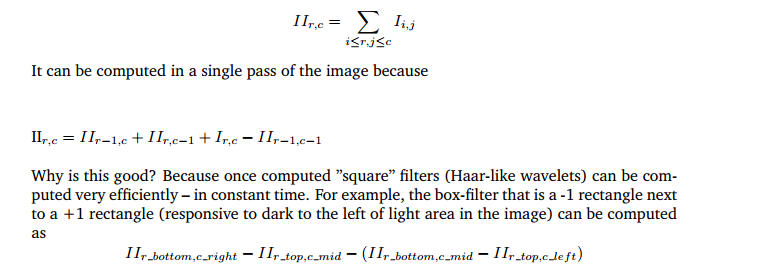

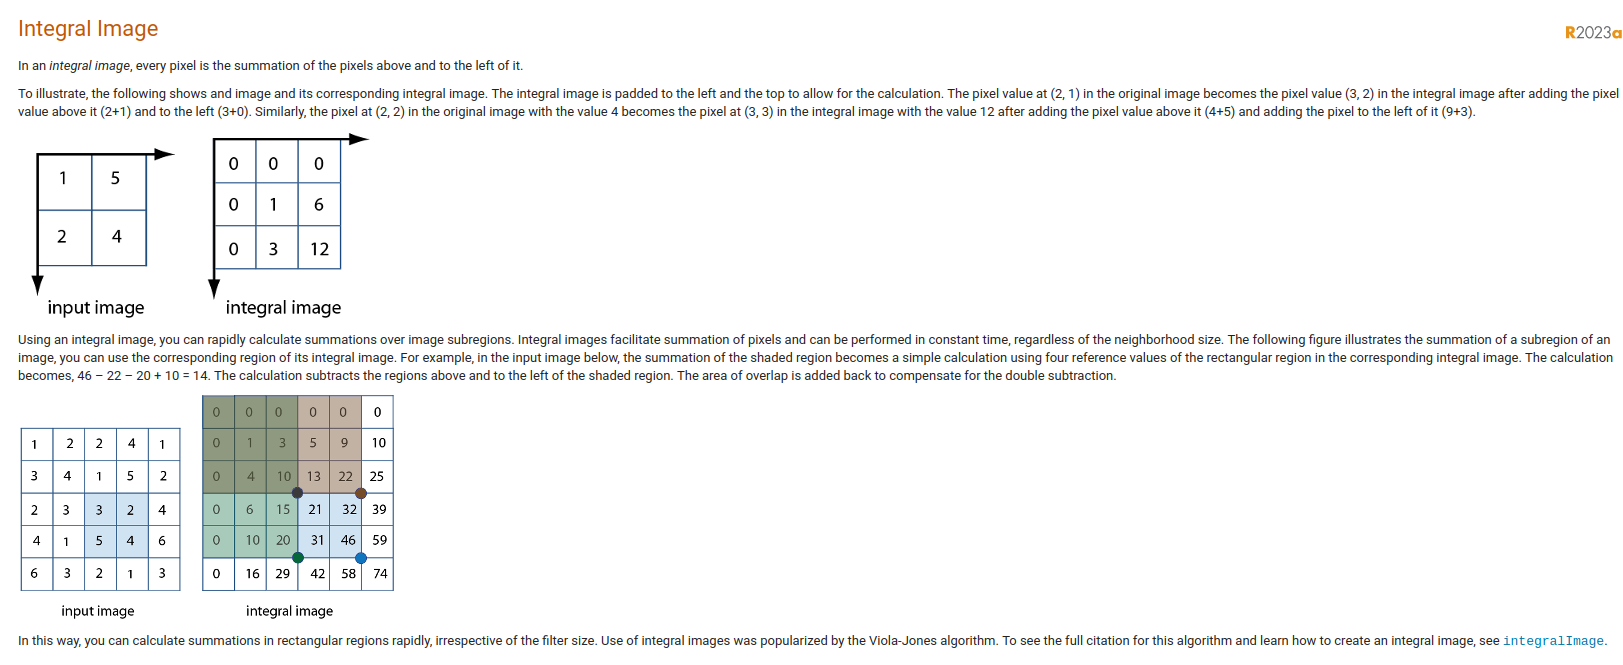

Reference: https://au.mathworks.com/help/images/integral-image.html

## Introduction

This week’s workshop reinforces lecture material on feature detection and description, as well as matching and geometry. The workshop builds on the **SIFT detector/descriptor** discussed in detail in lectures and considers two descendants, **SURF** and **ORB**. Furthermore, we will
look at how these can be used to create a image panorama.
Developing a solid understanding of all of this material will stand you in good stead for
Assignment 2.

# Feature dectectors and descriptors

The SIFT feature detector and descriptor covered in last week’s lecture is one of the most successful and widely used computer vision algorithms ever created.
Since its initial publication almost 20 years ago, many alternatives have been designed to tweak SIFT performance in certain situations, improve its efficiency, and so on. By looking at what they change about SIFT, and what they keep the same, we can get a better understanding of how each part of it works.
For this question, have a look at the SURF [1] and ORB [2] feature detector/descriptor
methods. These are both described in the Matlab and OpenCV documentation and also online
(for example Wikipedia). For each method, explain:
- what is its purpose - what is it trying to do better than previous methods?
- what is it doing that is new or different to previous methods? What parts of the overall detection and description process is it actually changing?



<mark>Useful resources to explore for this workshop and the Assignment 2</mark>
- Pages 13-21 in 03-descriptors.pdf, From 37:10 - 1:10:00 in Lecture 3 (2023-03-17) on Echo 360.
- Pages 461-466 in Richard Szeliski's Computer Vision: Algorithms and Applications, 2nd ed.
- SURF: https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html
- ORB: https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
- Comparison of SIFT, SURF, and ORB: https://mikhail-kennerley.medium.com/a-comparison-of-sift-surf-and-orb-on-opencv-59119b9ec3d0


## Image panoramas

A common application for image feature matching is to stitch overlapping images together to create a single panorama.

The steps involved in creating a panorama are described in Section 6.1.2 and Exercise 6.2 of the textbook **in the 1st edition**, Section 8.1.2 **in the 2nd edition**.  
A Matlab tutorial using a similar procedure is here:  
https://au.mathworks.com/help/vision/examples/feature-based-panoramic-image-stitching.html  
A python tutorial is here:  
https://towardsdatascience.com/image-panorama-stitching-with-opencv-2402bde6b46c  
Go through each step of the process to make sure you understand it, and try it out on some images of your own. What errors do you observe, and how might you avoid them?

## Image panoramas walkthrough
<font color='red'>[References]</font>  
[Image Stitching tutorial by Thalles Silva](https://towardsdatascience.com/image-panorama-stitching-with-opencv-2402bde6b46c)  
Original Colab Notebook from Thalles Silva: https://colab.research.google.com/drive/11Md7HWh2ZV6_g3iCYSUw76VNr4HzxcX5

**We integrated Thalles Silva's post into this notebook to help you understand better and avoid switching tabs constantly.**

### Introduction
Image stitching is one of the most successful applications in Computer Vision. Nowadays, it is hard to find a cell phone or an image processing API that does not contain this functionality.

In this piece, we will talk about how to perform image stitching using Python and OpenCV. Given a pair of images that share some common region, our goal is to “stitch” them and create a panoramic image scene.

Throughout this article, we go over some of the most famous Computer Vision techniques. These include:
* Keypoint detection
* Local invariant descriptors (SIFT, ORB, etc)
* Feature matching
* Homography estimation using RANSAC
* Perspective warping

We explore many feature extractors like SIFT, SURF (patented), BRISK, and ORB. You can follow along using this Colab notebook and even try it out with your pictures.

### Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Python library that provides an easy interface to read and write a wide range of image data
import imageio 

# A series of convenience functions to make basic image processing functions such as translation, 
# rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more easier with OpenCV 
import imutils 

# Disable OpenCL acceleration
cv2.ocl.setUseOpenCL(False)

### Select Feature Extractor and Matching Algorithm

In [ ]:
# select the image id (valid values 1,2,3, or 4)
feature_extractor = 'orb' # one of 'sift', 'surf', 'brisk', 'orb'
feature_matching = 'bf' # `bf` means Brute Force

ReadME

    When choosing the images bellow, make sure that the train image is the image to be transformed.

    For the images in the input folder, the image with id 3 should be inverted so that train image is the image B and query image is the image A.


### Load images and Convert into Grayscale

<ipython-input-3-4fd7aa3c1d07>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  trainImg = imageio.imread('http://www.ic.unicamp.br/~helio/imagens_registro/foto1A.jpg')
<ipython-input-3-4fd7aa3c1d07>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  queryImg = imageio.imread('http://www.ic.unicamp.br/~helio/imagens_registro/foto1B.jpg')


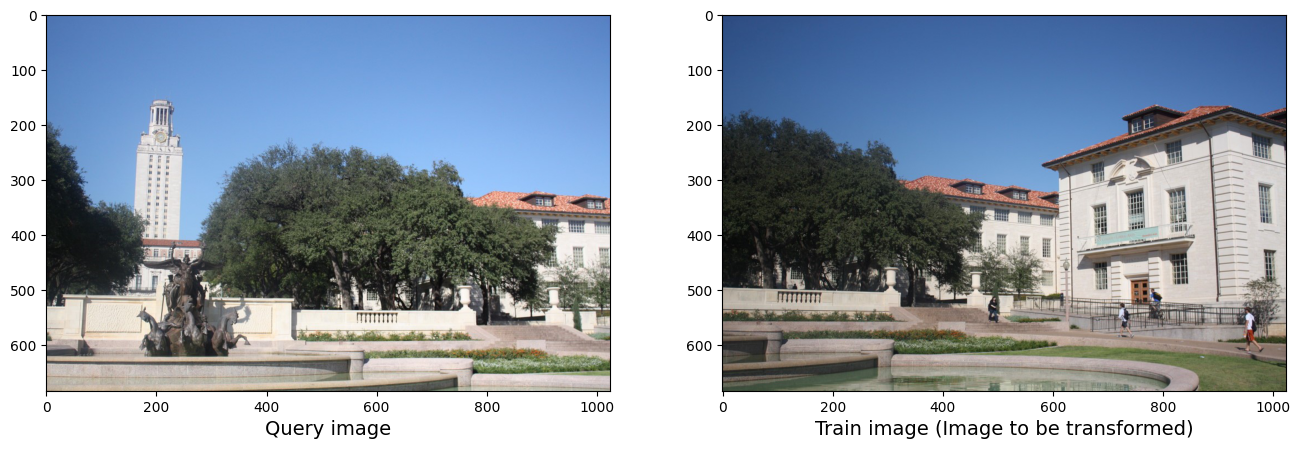

In [ ]:
# read images and transform them to grayscale
# Make sure that the train image is the image that will be transformed
trainImg = imageio.imread('http://www.ic.unicamp.br/~helio/imagens_registro/foto1A.jpg')
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

queryImg = imageio.imread('http://www.ic.unicamp.br/~helio/imagens_registro/foto1B.jpg')
# Opencv defines the color channel in the order BGR. 
# Transform it to RGB to be compatible to matplotlib
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

# Display a plot with 1 row & 2 columns
# ax1 will display the query image
# ax2 will display the train image
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg)
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg)
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()

In [ ]:
type(queryImg)

imageio.core.util.Array

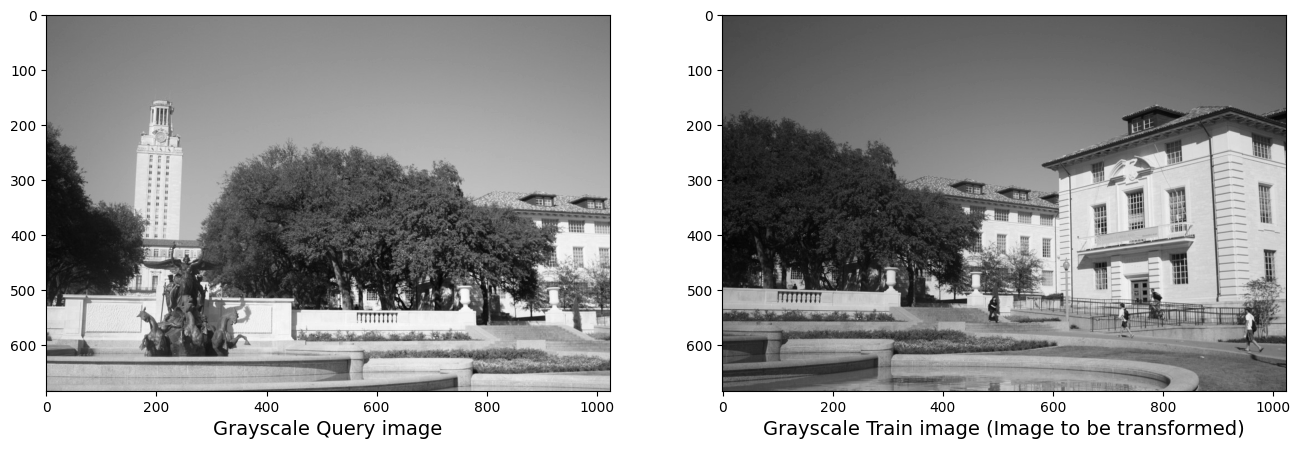

In [ ]:
# Display a plot with 1 row & 2 columns
# ax1 will display the grayscale query image
# ax2 will display the grayscale train image
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg_gray, cmap="gray")
ax1.set_xlabel("Grayscale Query image", fontsize=14)

ax2.imshow(trainImg_gray, cmap="gray")
ax2.set_xlabel("Grayscale Train image (Image to be transformed)", fontsize=14)

plt.show()

### Feature Detection and Extraction
Given a pair of images like the ones above, we want to stitch them to create a panoramic scene. It is important to note that both images need to share some common region.

Moreover, our solution has to be robust even if the pictures have differences in one or more of the following aspects:

* Scaling
* Angle
* Spacial position
* Capturing devices

The first step in that direction is to extract some key points and features of interest. These features, however, need to have some special properties.

Let’s first consider a simple solution.

### Keypoints Detection

An initial and probably naive approach would be to extract key points using an algorithm such as Harris Corners. Then, we could try to match the corresponding key points based on some measure of similarity like Euclidean distance. As we know, corners have one nice property: they are invariant to rotation. It means that, once we detect a corner, if we rotate an image, that corner will still be there.

However, what if we rotate then scale an image? In this situation, we would have a hard time because corners are not invariant to scale. That is to say, if we zoom-in to an image, the previously detected corner might become a line!

In summary, we need features that are invariant to rotation and scaling. That is where more robust methods like SIFT, SURF, and ORB come in.

### Keypoints and Descriptors.

Methods like SIFT and SURF try to address the limitations of corner detection algorithms. Usually, corner detector algorithms use a fixed size kernel to detect regions of interest (corners) on images. It is easy to see that when we scale an image, this kernel might become too small or too big.

To address this limitation, methods like SIFT uses Difference of Gaussians (DoD). The idea is to apply DoD on differently scaled versions of the same image. It also uses the neighboring pixel information to find and refine key points and corresponding descriptors.

To start, we need to load 2 images, a query image, and a training image. Initially, we begin by extracting key points and descriptors from both. We can do it in one step by using the OpenCV detectAndCompute() function. Note that in order to use detectAndCompute() we need an instance of a keypoint detector and descriptor object. It can be ORB, SIFT or SURF, etc. Also, before feeding the images to detectAndCompute() we convert them to grayscale.

In [ ]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method

    Args:
      image: the loaded image as an array
      method (str): one of the supported methods in ['sift', 'surf', 'brisk', 'orb']

    Returns:
      Tuple(kps, features): A tuple of keypoints and extracted features which are
        detected and computed by using the selected method.
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

We run *detectAndDescribe()* on both, the query and the train image. At this point, we have a set of key points and descriptors for both images. If we use SIFT as the feature extractor, it returns a 128-dimensional feature vector for each key point. If SURF is chosen, we get a 64-dimensional feature vector. The following images show some of the features extracted using SIFT, SURF, BRISK, and ORB.

### SIFT

In [ ]:
feature_extractor = 'sift'

In [ ]:
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

In [ ]:
# Keypoints and Extracted Features of Grayscale Train Image
# kpsA is a tuple of cv2.KeyPoint objects
# featuresA is an array of features with each row corresponds to one detected keypoint. 
# Please notice the dimension of extracted feature, this value depends on the selected feature extraction algorithm.
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)

# Keypoints and Extracted Features of Grayscale Query Image
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

In [ ]:
featuresA.shape[1]

128

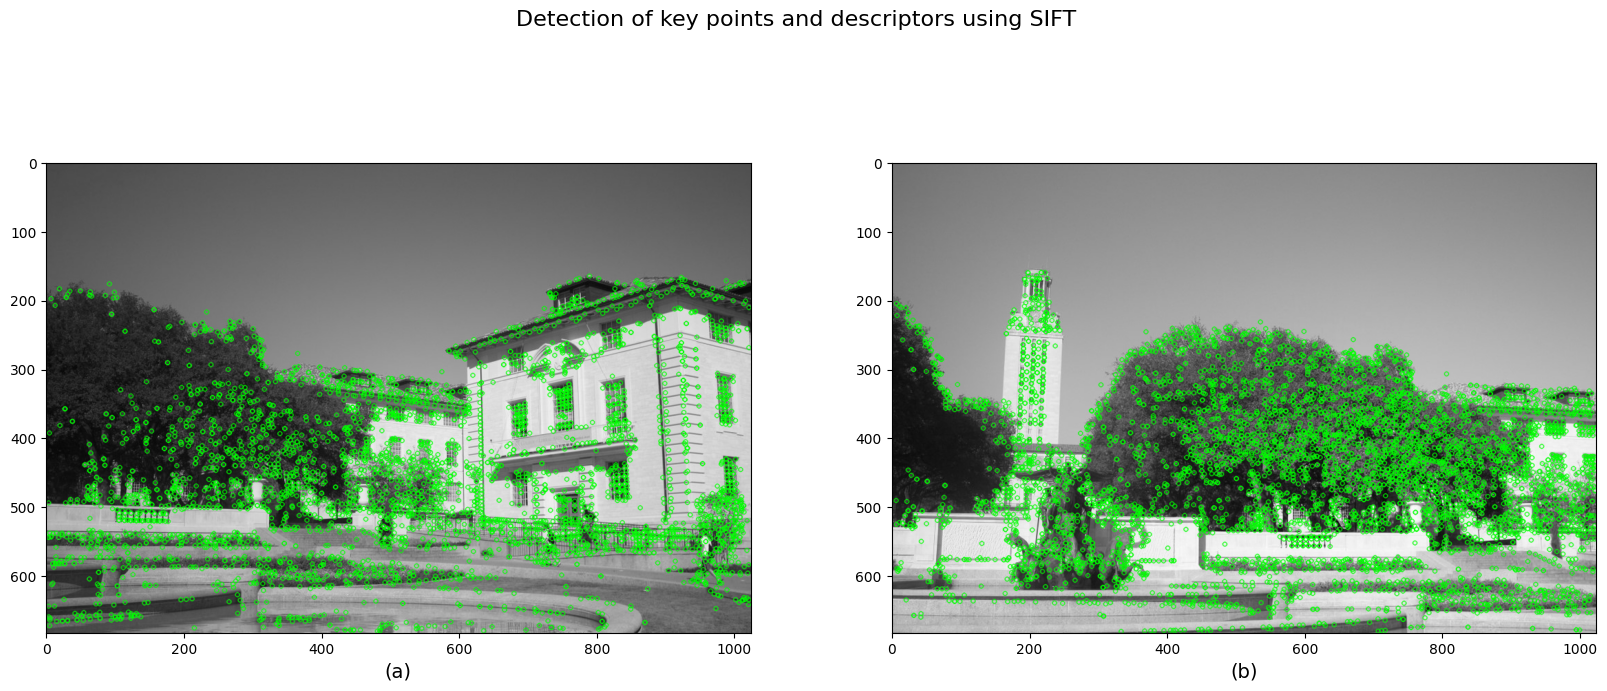

In [ ]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)
fig.suptitle(f'Detection of key points and descriptors using {feature_extractor.upper()}', fontsize=16)
plt.show()

### SURF (Patented)
Unfortunately, SURF is patented and no longer included in OpenCV version >=3. There was a hack that we install `pip install opencv-contrib-python` or downgrade to 3.4.2.17 to use SURF, but it seems to be fixed to avoid legal issues.

In [ ]:
# feature_extractor = 'surf'

In [ ]:
# kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
# kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

In [ ]:
# # Keypoints and Extracted Features of Grayscale Train Image
# # kpsA is a tuple of cv2.KeyPoint objects
# # featuresA is an array of features with each row corresponds to one detected keypoint. 
# # Please notice the dimension of extracted feature, this value depends on the selected feature extraction algorithm.
# kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)

# # Keypoints and Extracted Features of Grayscale Query Image
# kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

In [ ]:
# featuresA.shape[1]

In [ ]:
# # display the keypoints and features detected on both images
# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
# ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
# ax1.set_xlabel("(a)", fontsize=14)
# ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
# ax2.set_xlabel("(b)", fontsize=14)
# fig.suptitle(f'Detection of key points and descriptors using {feature_extractor.upper()}', fontsize=16)
# plt.show()

### ORB

In [ ]:
feature_extractor = 'orb'

In [ ]:
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

In [ ]:
# Keypoints and Extracted Features of Grayscale Train Image
# kpsA is a tuple of cv2.KeyPoint objects
# featuresA is an array of features with each row corresponds to one detected keypoint. 
# Please notice the dimension of extracted feature, this value depends on the selected feature extraction algorithm.
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)

# Keypoints and Extracted Features of Grayscale Query Image
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

In [ ]:
featuresA.shape[1]

32

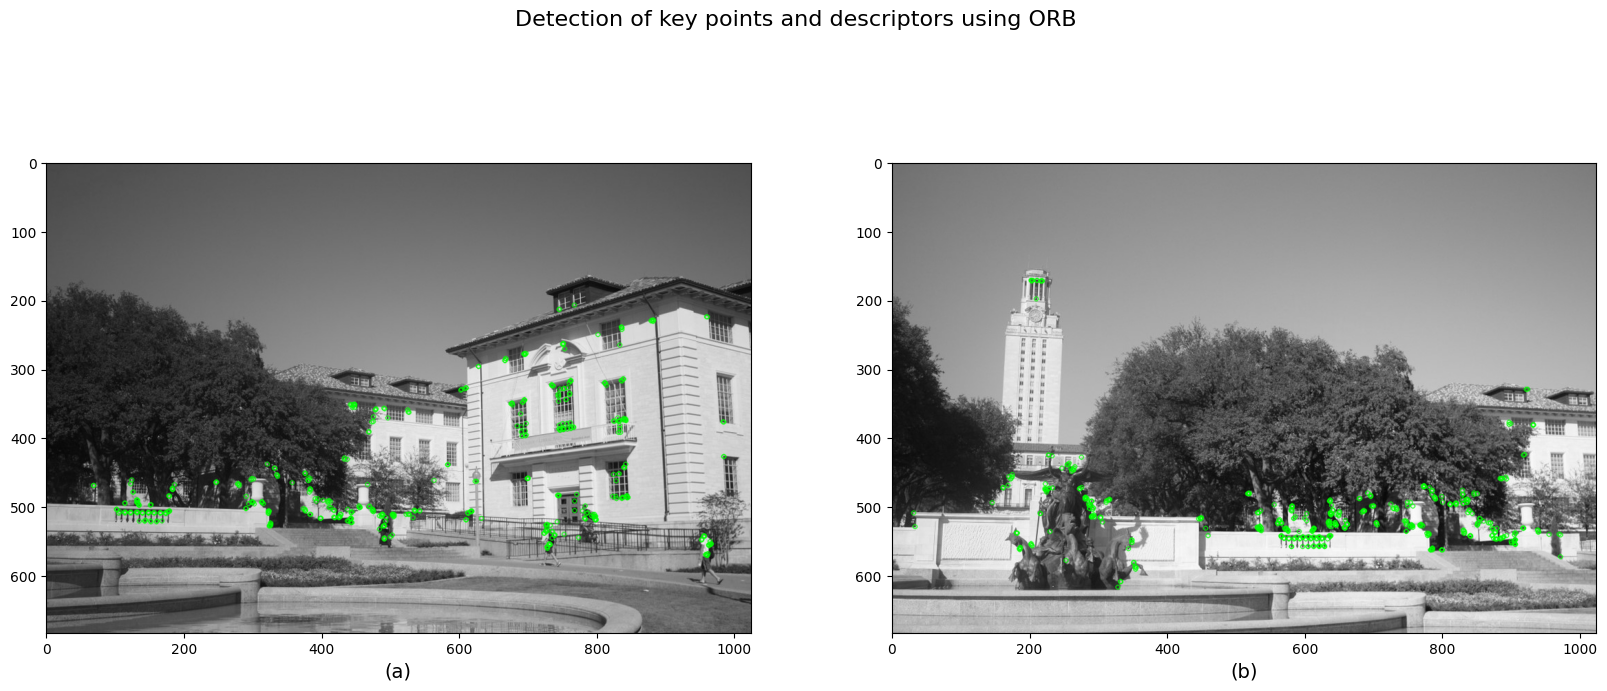

In [ ]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)
fig.suptitle(f'Detection of key points and descriptors using {feature_extractor.upper()}', fontsize=16)
plt.show()

### Feature Matching

As we can see, we have a large number of features from both images. Now, we would like to compare the 2 sets of features and stick with the pairs that show more similarity.

With OpenCV, feature matching requires a Matcher object. Here, we explore two flavors:

    Brute Force Matcher
    KNN (k-Nearest Neighbors)

The BruteForce (BF) Matcher does exactly what its name suggests. Given 2 sets of features (from image A and image B), each feature from set A is compared against all features from set B. By default, BF Matcher computes the Euclidean distance between two points. Thus, for every feature in set A, it returns the closest feature from set B. For SIFT and SURF OpenCV recommends using Euclidean distance. For other feature extractors like ORB and BRISK, Hamming distance is suggested.

To create a BruteForce Matcher using OpenCV we only need to specify 2 parameters. The first is the distance metric. The second is the *crossCheck* boolean parameter.

The *crossCheck* bool parameter indicates whether the two features have to match each other to be considered valid. In other words, for a pair of features (f1, f2) to considered valid, f1 needs to match f2 and f2 has to match f1 as the closest match as well. This procedure ensures a more robust set of matching features and is described in the original SIFT paper.

However, for cases where we want to consider more than one candidate match, we can use a KNN based matching procedure.

    Instead of returning the single best match for a given feature, KNN returns the k best matches.

Note that the value of k has to be pre-defined by the user. As we expect, KNN provides a larger set of candidate features. However, we need to ensure that all these matching pairs are robust before going further.

### Ratio Testing

<font color='FF4081'>Ratio Testing explanation</font> From 1:31:00 to 1:34:50 in Lecture 3 (2023-03-17) on Echo 360

To make sure the features returned by KNN are well comparable, the authors of the SIFT paper, suggests a technique called ratio test. Basically, we iterate over each of the pairs returned by KNN and perform a distance test. For each pair of features (f1, f2), if the distance between f1 and f2 is within a certain ratio, we keep it, otherwise, we throw it away. Also, the ratio value must be chosen manually.

In essence, ratio testing does the same job as the cross-checking option from the BruteForce Matcher. Both, ensure a pair of detected features are indeed close enough to be considered similar. The 2 figures below show the results of BF and KNN Matcher on SIFT features. We chose to display only 100 matching points to clear visualization.

### Create Matcher

In [ ]:
def createMatcher(method,crossCheck):
    """Create and return a Matcher Object
      Args:
        method (str): The selected feature extraction method.
        crossCheck (bool):  If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa.

      Returns
        bf (cv2.BFMatcher obj)    
    """
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

In [ ]:
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(featuresA,featuresB)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

In [ ]:
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

Using: bf feature matcher
Raw matches (Brute force): 1822


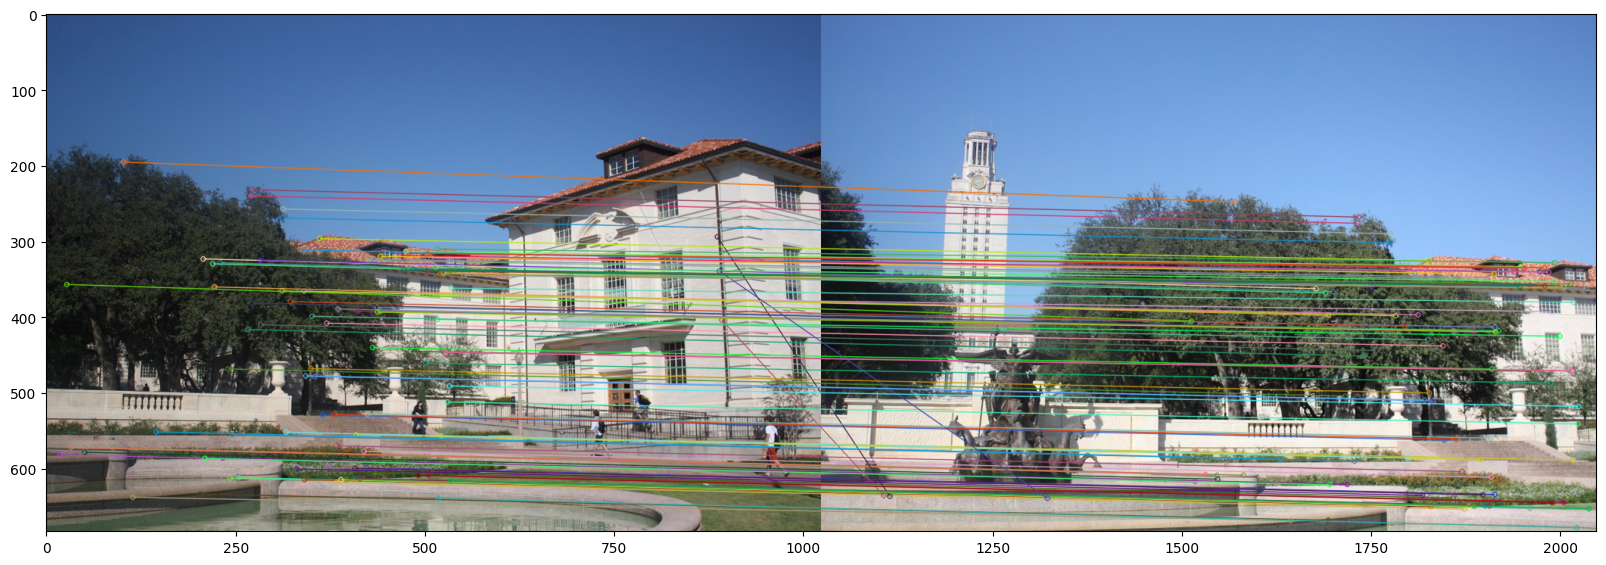

In [ ]:
feature_matching = 'bf' # Brute Force
print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.show()

Using: knn feature matcher
Raw matches (knn): 500


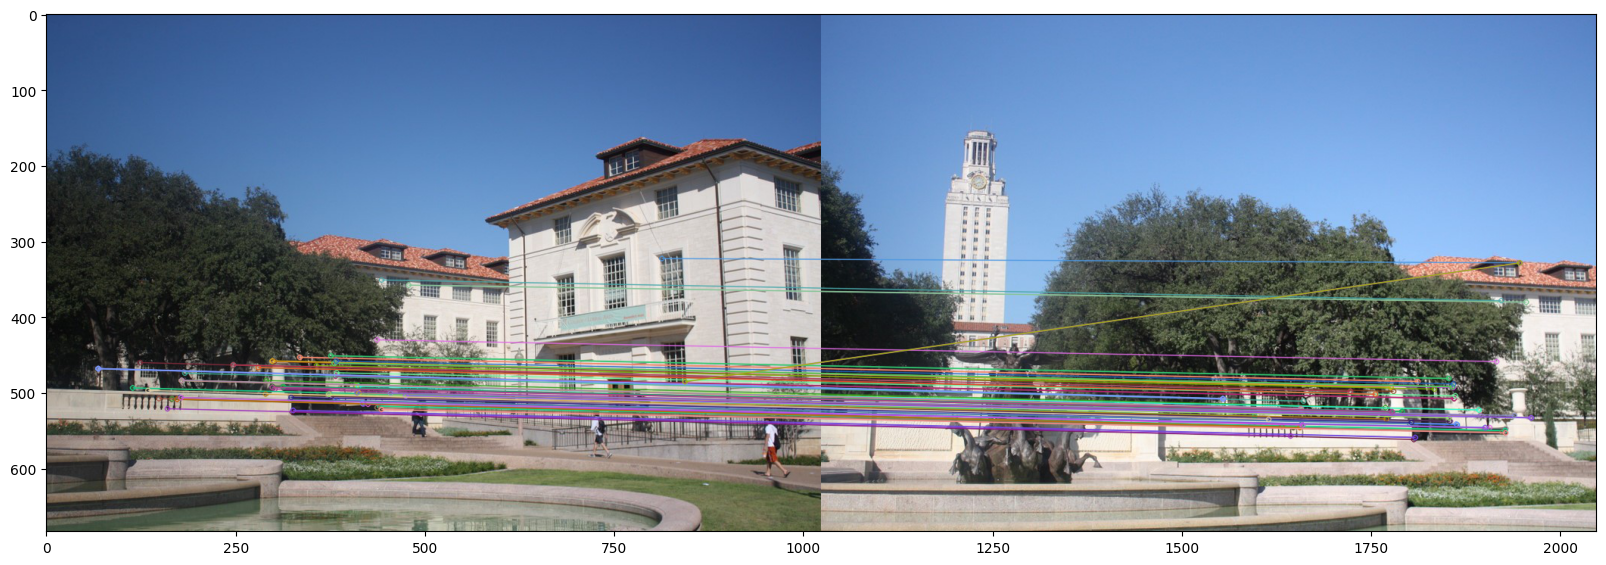

In [ ]:
feature_matching_2 = 'knn' # k-Nearest Neighbors
print("Using: {} feature matcher".format(feature_matching_2))

fig = plt.figure(figsize=(20,8))

if feature_matching_2 == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching_2 == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.show()

### Estimating the Homography

<font color='FF4081'>RANSAC explanation</font> From 1:40 to 8:15 in Lecture 4 on Echo 360

RANdom SAmple Consensus or RANSAC is an iterative algorithm to fit linear models. Different from other linear regressors, RANSAC is designed to be robust to outliers.

Models like Linear Regression uses least-squares estimation to fit the best model to the data. However, ordinary least squares is very sensitive to outliers. As a result, it might fail if the number of outliers is significant.

RANSAC solves this problem by estimating parameters only using a subset of inliers in the data. The figure below shows a comparison between Linear Regression and RANSAC. First, note that the dataset contains a fairly high number of outliers.

We can see that the Linear Regression model gets easily influenced by the outliers. That is because it is trying to reduce the average error. Thus, it tends to favor models that minimize the overall distance from all data points to the model itself. And that includes outliers.

On the contrary, RANSAC only fits the model on the subset of points identified as the inliers.

This characteristic is very important to our use case. Here, we are going to use RANSAC to estimate the Homography matrix. It turns out that the Homography is very sensitive to the quality of data we pass to it. Hence, it is important to have an algorithm (RANSAC) that can filter points that clearly belong to the data distribution from the ones which do not.

<font color='FF4081'>Please rerun the cells of SIFT subsection to get the result similar to the post.</font> However, please feel free to test other feature extractors after observing SIFT's result.

In [ ]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [ ]:
M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

[[ 7.68784937e-01  3.09782583e-02  4.47333162e+02]
 [-1.32607000e-01  9.07260450e-01  7.65155495e+01]
 [-2.05492540e-04 -3.95790992e-05  1.00000000e+00]]


Once we have the estimated Homography, we need to warp one of the images to a common plane.

Here, we are going to apply a perspective transformation to one of the images. Basically, a perspective transform may combine one or more operations like rotation, scale, translation, or shear. The idea is to transform one of the images so that both images merge as one. To do this, we can use the OpenCV *warpPerspective()* function. It takes an image and the homography as input. Then, it warps the source image to the destination based on the homography.

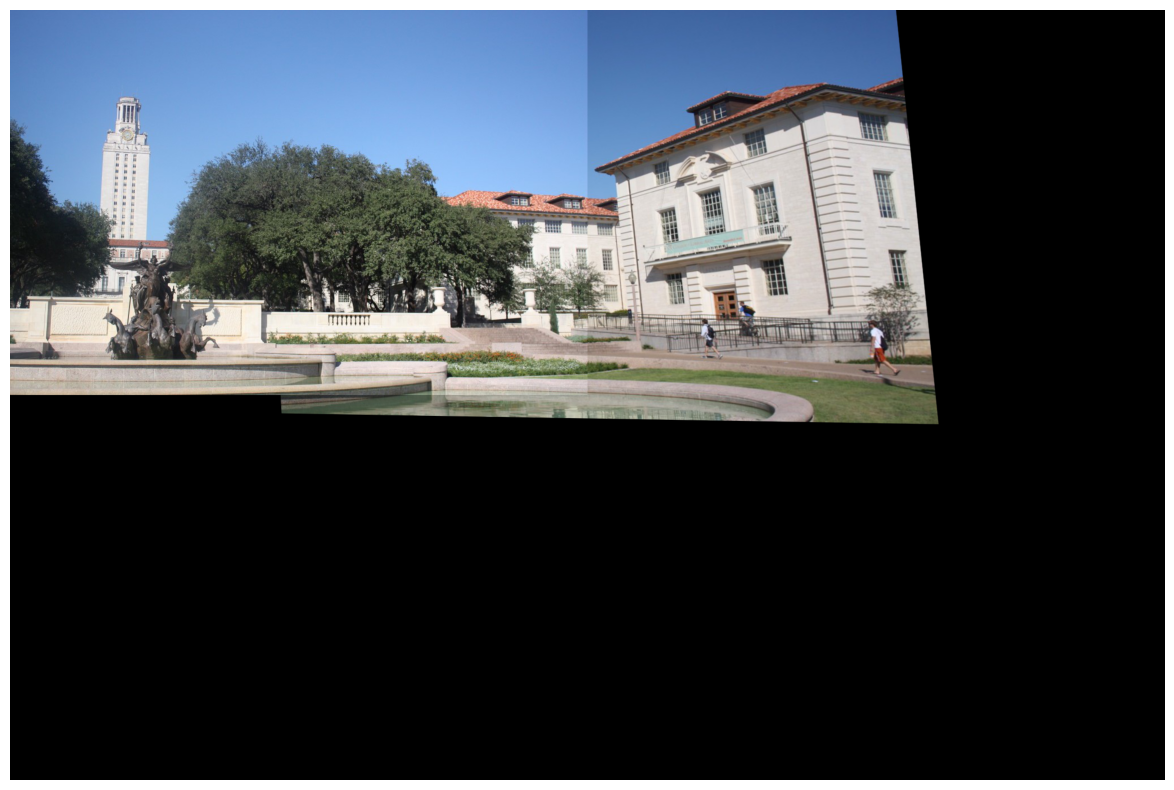

In [ ]:
# Apply panorama correction
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

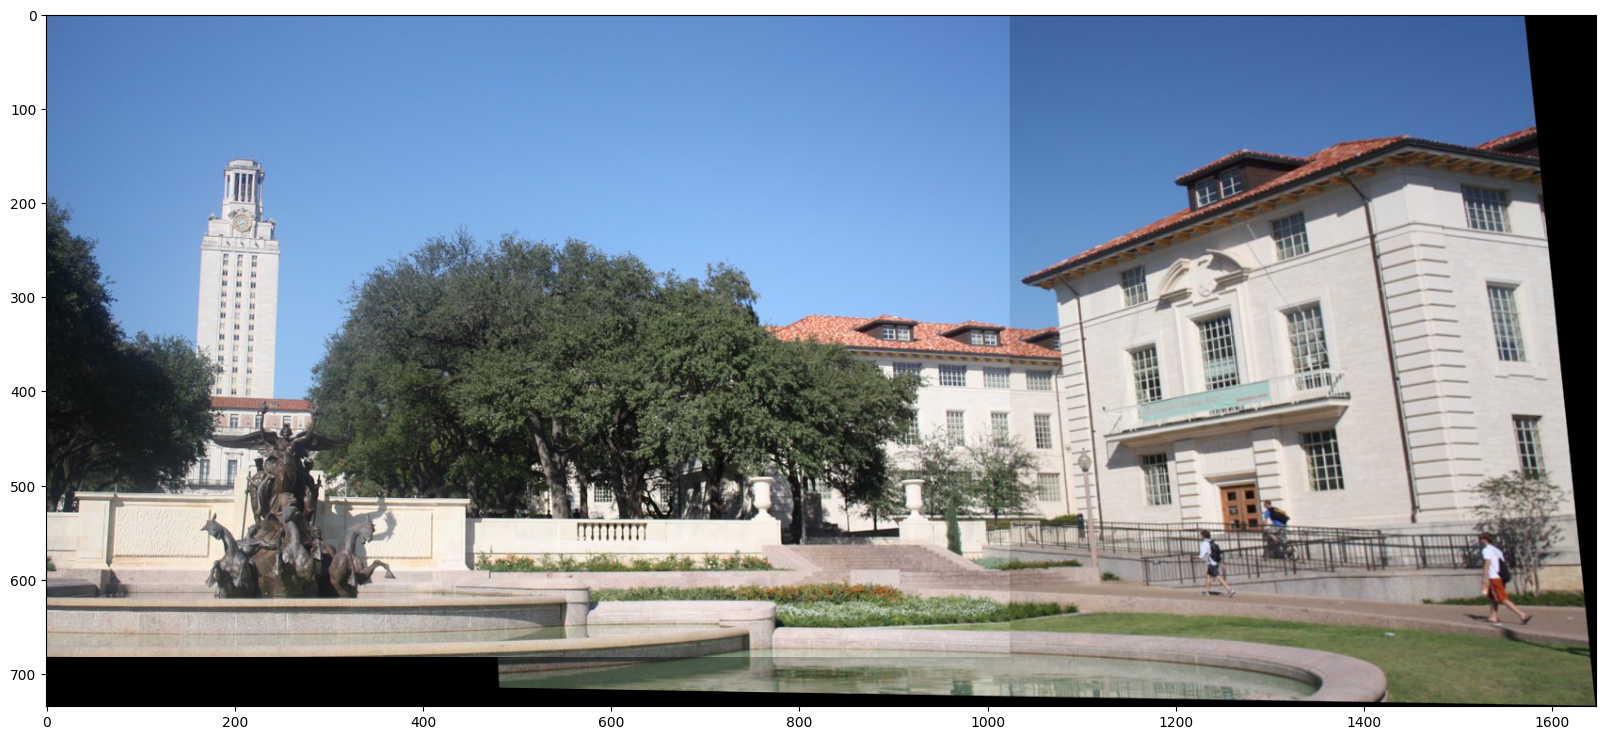

In [ ]:
# transform the panorama image to grayscale and threshold it 
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(result)

# Now, it's your turn to practice!

## References: 
[1] H. Bay, A. Ess, T. Tuytelaars, L. Van Gool, SURF: Speeded Up Robust Features. Computer
Vision and Image Understanding (CVIU), Vol. 110, No. 3, 2008  
[2] E. Rublee, V. Rabaud, K. Konolige, G. Bradski, ORB: An efficient alternative to SIFT or
SURF. Int. Conf. Computer Vision, 2011.